In [1]:
import os.path as osp
import os 
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

CBcolors = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
} 

Path for current Tests

In [2]:
rootfrags = osp.abspath('Location.ipynb').split("\\")
root = ""
for d in rootfrags:
    if d == "FieldNBalance":
        break
    else:
        root += d + "\\"
inPath = osp.join(root,"FieldNBalance","TestComponents", "TestSets", "Location", "Outputs")
outPath = osp.join(root,"FieldNBalance","TestGraphs", "Outputs")  

Get names and results from each test

In [3]:
testFiles = []
tests = []
for file in os.listdir(inPath):
    if file.endswith('.csv'):
        testFiles.append(file)
        tests.append(file.replace(".csv",""))

Pack tests up into dataframe for graphing

In [4]:
Alltests =[]
for t in testFiles[:]:  
    testframe = pd.read_csv(osp.join(inPath, t),index_col=0,dayfirst=True,date_format='%d/%m/%Y %H:%M:%S %p')  
    Alltests.append(testframe)   

AllData = pd.concat(Alltests,axis=1,keys=tests)
AllData.sort_index(axis=0,inplace=True)
AllData.index = pd.to_datetime(AllData.index)

Make graph

In [5]:
colors = ['purple','purple','green','green','orange','orange','blue','blue','red','red','yellow','yellow',]
lines = ['-','--','-','--','-','--','-','--','-','--','-','--']

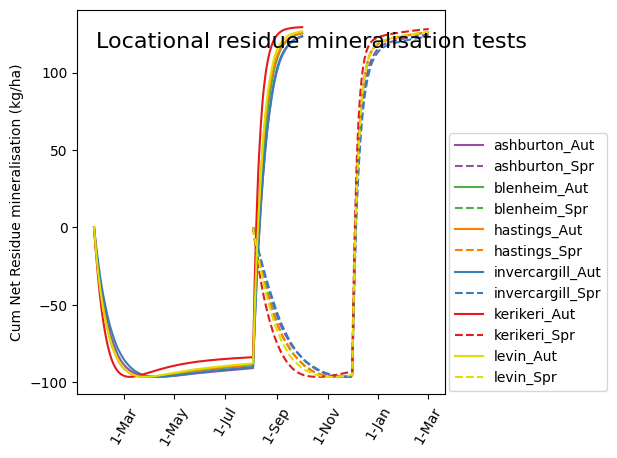

In [6]:
Graph = plt.figure()
ax = Graph.add_subplot(1,1,1)
pos = 0
for t in tests:
    plt.plot(AllData.loc[:,(t,'ResidueN')].cumsum(),lines[pos],color=CBcolors[colors[pos]],label = t)
    pos +=1
plt.legend(loc=(1.01,0.01))
plt.ylabel('Cum Net Residue mineralisation (kg/ha)')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
plt.text(0.05,0.9,"Locational residue mineralisation tests",fontsize = 16,transform=ax.transAxes)
Graph.tight_layout(pad=1.5)
plt.savefig(osp.join(outPath,'Location_Residues.png'))

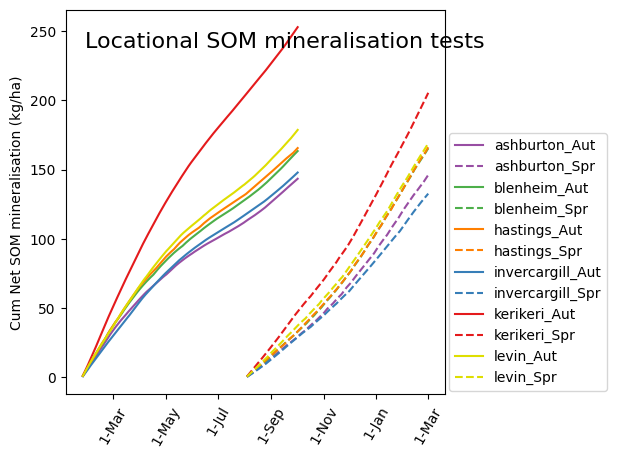

In [7]:
Graph = plt.figure()
ax = Graph.add_subplot(1,1,1)
pos = 0
for t in tests:
    plt.plot(AllData.loc[:,(t,'SoilOMN')].cumsum(),lines[pos],color=CBcolors[colors[pos]],label = t)
    pos +=1
plt.legend(loc=(1.01,0.01))
plt.ylabel('Cum Net SOM mineralisation (kg/ha)')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
plt.text(0.05,0.9,"Locational SOM mineralisation tests",fontsize = 16,transform=ax.transAxes)
Graph.tight_layout(pad=1.5)
plt.savefig(osp.join(outPath,'Location_SOM.png'))

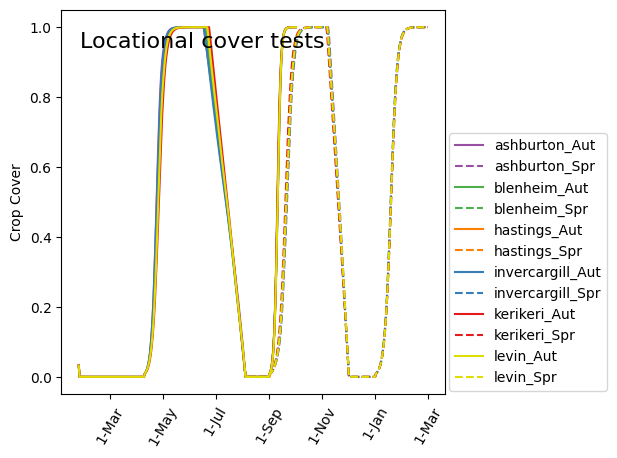

In [8]:
Graph = plt.figure()
ax = Graph.add_subplot(1,1,1)
pos = 0
for t in tests:
    plt.plot(AllData.loc[:,(t,'Green cover')],lines[pos],color=CBcolors[colors[pos]],label = t)
    pos +=1
plt.legend(loc=(1.01,0.01))
plt.ylabel('Crop Cover')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
plt.text(0.05,0.9,"Locational cover tests",fontsize = 16,transform=ax.transAxes)
Graph.tight_layout(pad=1.5)
plt.savefig(osp.join(outPath,'Location_Cover.png'))

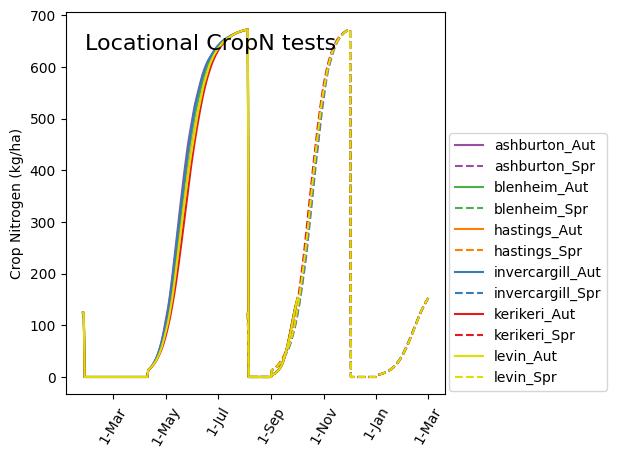

In [9]:
Graph = plt.figure()
ax = Graph.add_subplot(1,1,1)
pos = 0
for t in tests:
    plt.plot(AllData.loc[:,(t,'CropN')],lines[pos],color=CBcolors[colors[pos]],label = t)
    pos +=1
plt.legend(loc=(1.01,0.01))
plt.ylabel('Crop Nitrogen (kg/ha)')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
plt.text(0.05,0.9,"Locational CropN tests",fontsize = 16,transform=ax.transAxes)
Graph.tight_layout(pad=1.5)
plt.savefig(osp.join(outPath,'Location_CropN.png'))